In [1]:
# Handle dataframes
import pandas as pd
import os

# Model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# encoder
from sklearn.preprocessing import LabelEncoder

# accuracy test
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import accuracy_score

# Different methods used
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.naive_bayes import BernoulliNB

# Gridsearch
from sklearn.model_selection import GridSearchCV

#test
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
df = pd.read_csv("modeChoiceData.csv")
df.head()

,ID,time_car,cost_car,time_bus,cost_bus,access_bus,time_air,cost_air,access_air,service_air,time_rail,cost_rail,access_rail,service_rail,choice
0,1,275,50,330,35,20,80,65,55,food,120,45,5,no-frills,air
1,2,275,45,330,15,5,70,110,40,wifi,170,55,25,food,rail
2,3,275,45,390,15,25,70,80,55,no-frills,155,35,5,no-frills,rail
3,4,300,45,300,15,10,60,110,40,wifi,155,65,20,no-frills,rail
4,5,390,35,390,35,10,60,95,45,wifi,155,65,15,food,rail


In [3]:
encoder = LabelEncoder()

# Use the LabelEncoder to transform the 'Education level' column from categorical to numerical values
df['choice'] = encoder.fit_transform(df['choice'])
df.head(1000)

,ID,time_car,cost_car,time_bus,cost_bus,access_bus,time_air,cost_air,access_air,service_air,time_rail,cost_rail,access_rail,service_rail,choice
0,1,275,50,330,35,20,80,65,55,food,120,45,5,no-frills,0
1,2,275,45,330,15,5,70,110,40,wifi,170,55,25,food,3
2,3,275,45,390,15,25,70,80,55,no-frills,155,35,5,no-frills,3
3,4,300,45,300,15,10,60,110,40,wifi,155,65,20,no-frills,3
4,5,390,35,390,35,10,60,95,45,wifi,155,65,15,food,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,390,30,420,20,15,50,80,55,wifi,140,55,5,no-frills,3
996,997,250,50,420,15,25,90,65,45,no-frills,120,75,5,food,0
997,998,300,30,390,20,5,70,110,40,no-frills,155,75,25,wifi,2
998,999,250,40,330,35,10,90,80,40,no-frills,170,35,25,wifi,2


In [4]:
# perform one-hot encoding on the 'Education level' column
df = pd.get_dummies(df, columns=['service_air'])
df = pd.get_dummies(df, columns=['service_rail'])
df.head()

,ID,time_car,cost_car,time_bus,cost_bus,access_bus,time_air,cost_air,access_air,time_rail,cost_rail,access_rail,choice,service_air_food,service_air_no-frills,service_air_wifi,service_rail_food,service_rail_no-frills,service_rail_wifi
0,1,275,50,330,35,20,80,65,55,120,45,5,0,1,0,0,0,1,0
1,2,275,45,330,15,5,70,110,40,170,55,25,3,0,0,1,1,0,0
2,3,275,45,390,15,25,70,80,55,155,35,5,3,0,1,0,0,1,0
3,4,300,45,300,15,10,60,110,40,155,65,20,3,0,0,1,0,1,0
4,5,390,35,390,35,10,60,95,45,155,65,15,3,0,0,1,1,0,0


In [5]:
#Define x and y

x = df.drop(['choice','ID',], axis=1)
y = df['choice']

#x.head()
#y.head()

#Devide into train och test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)


In [6]:
param_grid = {
#     'n_neighbors': [3, 5, 7, 9],
#     'weights': ['uniform', 'distance']
}
# creating the model
KNN_model=KNeighborsClassifier()
# using the grid parameters
grid_search = GridSearchCV(estimator=KNN_model, param_grid=param_grid, cv=5, scoring='accuracy')
# grid search to the data
grid_search.fit(x_train, y_train)

# best parameters and best estimator from the grid search
best_params = grid_search.best_params_
print(best_params)
# Retrieve the best cross-validated accuracy score achieved with the best hyperparameters
best_score = grid_search.best_score_
print(best_score)
# Set 'model' to be the best estimator (model with the best hyperparameters) identified by the grid search
best_KNN = grid_search.best_estimator_

# Define a model maximum of 1000 iterations and a fixed random seed

# Train the LogisticRegression model on the training data

cmd.from_estimator(best_KNN, x_test, y_test,cmap='Blues',colorbar=False)

# Calculate the accuracy of the model by comparing predicted labels to true labels
# Compute mae, mse r2
y_pred = best_KNN.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('The accuracy of the model is: '+str(accuracy_score(y_test,beast_RF.predict(x_test))))
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
# Print the best parameters
print("Best Parameters:", best_params)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
{}
nan


/Users/jesperhelen/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/jesperhelen/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/jesperhelen/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "/Users/jesperhelen/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/jesperhelen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py", line 246, in predict
    if self._fit_method == "brute" and ArgKminClassMode.is_usable_for(
  File "/Users/jesp

AttributeError: 'Flags' object has no attribute 'c_contiguous'

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
The accuracy of the model is: 0.5113636363636364
Mean Absolute Error: 0.810064935064935
Mean Squared Error: 1.6574675324675325
R-squared: -0.229334235067151
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}


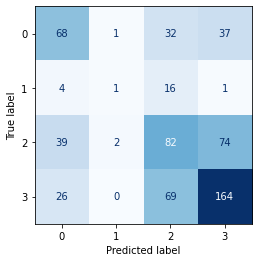

In [10]:
param_grid = {
    'n_estimators': [300],#[100, 200, 300],
    'max_depth': [10],#[None, 10, 20, 30],
    'min_samples_split': [5],#[2, 5, 10],
    'min_samples_leaf': [2]#[1, 2, 4]
}
# creating the model
RF_model = RandomForestClassifier(random_state=0)
# using the grid parameters
grid_search = GridSearchCV(estimator=RF_model, param_grid=param_grid, cv=5, scoring='accuracy')
# grid search to the data
grid_search.fit(x_train, y_train)

# best parameters and best estimator from the grid search
best_params = grid_search.best_params_
print(best_params)
# Retrieve the best cross-validated accuracy score achieved with the best hyperparameters
best_score = grid_search.best_score_

# Set 'model' to be the best estimator (model with the best hyperparameters) identified by the grid search
best_RF = grid_search.best_estimator_

# Define a model maximum of 1000 iterations and a fixed random seed

# Train the LogisticRegression model on the training data

cmd.from_estimator(best_RF, x_test, y_test,cmap='Blues',colorbar=False)

# Calculate the accuracy of the model by comparing predicted labels to true labels
# Compute mae, mse r2
y_pred = best_RF.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('The accuracy of the model is: '+str(accuracy_score(y_test,best_RF.predict(x_test))))
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
# Print the best parameters
print("Best Parameters:", best_params)

In [ ]:

# Define a model maximum of 1000 iterations and a fixed random seed
model = LogisticRegression(max_iter=1000, random_state=0)

# Train the LogisticRegression model on the training data
model.fit(x_train, y_train)

cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)

# Calculate the accuracy of the model by comparing predicted labels to true labels
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test))))

In [ ]:
param_grid = {
     'learning_rate': [0.01]#[0.01, 0.1, 0.2],
     'n_estimators': [100]#[100, 200, 300],
     'max_depth': [3]#[3, 4, 5]
}
# creating the model
xgb_model = XGBClassifier()
# using the grid parameters
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy')
# grid search to the data
grid_search.fit(x_train, y_train)

# best parameters and best estimator from the grid search
best_params = grid_search.best_params_
best_xgb = xgb.XGBClassifier(learning_rate=best_params['learning_rate'], n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'])
best_xgb.fit(x_train, y_train)

# Define a model maximum of 1000 iterations and a fixed random seed

# Train the LogisticRegression model on the training data

cmd.from_estimator(best_xgb, x_test, y_test,cmap='Blues',colorbar=False)

# Calculate the accuracy of the model by comparing predicted labels to true labels
# Compute mae, mse r2
y_pred = best_xgb.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test))))
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
# Print the best parameters
print("Best Parameters:", best_params)